### Contrast Stretching, Clipping and Thresholding

Contrast Stretching is one of the point processing techniques, that is done to enhance the contrast of an image. This can be applied on the RGB as well as Gray scale images. As this is a point processing technique, no kernel is required as in the case of local neighbourhood processing techniques.

In [1]:
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt

In [5]:
def contrast_lookup():
    max_original_scale = 256
    min_original_scale = 0
    lookup_table = np.zeros(shape=[4,max_original_scale],dtype=int)
    lookup_table[0,:] = np.arange(min_original_scale,max_original_scale,1,int)

    max_stretched_scale_red = 230
    min_stretched_scale_red = 86

    max_stretched_scale_green = 225
    min_stretched_scale_green = 90

    max_stretched_scale_blue = 210
    min_stretched_scale_blue = 100

    lookup_table[1,:] = np.asarray(((lookup_table[0,:] - min_stretched_scale_red) * ((max_original_scale - min_original_scale) / (max_stretched_scale_red - min_stretched_scale_red) + min_original_scale)),dtype=int)
    lookup_table[2,:] = np.asarray(((lookup_table[0,:] - min_stretched_scale_green) * ((max_original_scale - min_original_scale) / (max_stretched_scale_green - min_stretched_scale_green) + min_original_scale)), dtype=int)
    lookup_table[3,:] = np.asarray(((lookup_table[0,:] - min_stretched_scale_blue) * ((max_original_scale - min_original_scale) / (max_stretched_scale_blue - min_stretched_scale_blue) + min_original_scale)), dtype=int)

    for i in range(1,4):
        for j in range(0,256):
            if(lookup_table[i,j]<0):
                lookup_table[i,j] = 0
            elif(lookup_table[i,j]>255):
                lookup_table[i,j] = 255

    plt.figure(figsize=(10,6))

    plt.subplot(1,3,1)
    plt.plot(lookup_table[0,:],lookup_table[1,:],'r')
    plt.show()

    return lookup_table

In [6]:
def contrast_stretching(image):
    lookup_table = contrast_lookup()

    red_band = image[:, :, 0]
    green_band = image[:, :, 1]
    blue_band = image[:, :, 2]

    red_contrast = lookup_table[1,red_band]
    green_contrast = lookup_table[2,green_band]
    blue_contrast = lookup_table[3,blue_band]

    contrast_image = np.zeros(image.shape, dtype=int)
    contrast_image[:, :, 0] = red_contrast
    contrast_image[:, :, 1] = green_contrast
    contrast_image[:, :, 2] = blue_contrast

    return contrast_image

C:\Users\z003u7us.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


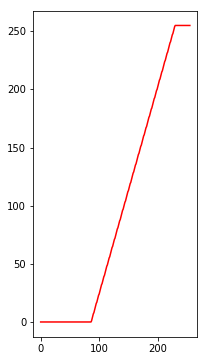

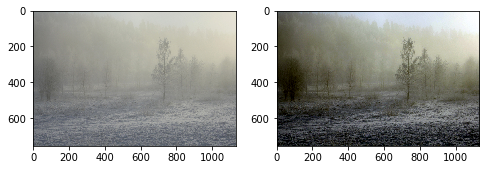

In [7]:
image = misc.imread('D:\ml and dl\code\scikit-image\Images\gray01.jpg')

contrast_stretched_image = contrast_stretching(image)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(contrast_stretched_image)

plt.show()